# Fuel Economy Analysis (2008-2018)

### In this report we will look at the improvements made in fuel economy over the past 10 years. 
   

In [27]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [28]:
df_08 = pd.read_csv('./all_alpha_08.csv')
df_18 = pd.read_csv('./all_alpha_18.csv')

### Data Cleaning

##### Rename 'Sales Area' to 'Cert Region' in 2008 dataframe

In [35]:
df_08.rename(columns={"Sales Area": "Cert Region"}, inplace=True)


#### Rename all columns

In [21]:
df_08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)


In [37]:
df_18.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)


#### Cars driven in the U.S. are credited only through California. Knowing this, I decided to remove all records that don't have a 'CA' certification region

#### Drop cert_region column

In [39]:
df_08.drop(columns=['cert_region'], axis=1, inplace=True)
df_18.drop(columns=['cert_region'], axis=1, inplace=True)

#### Drop records with missing values

In [40]:
df_08.dropna(inplace=True)
df_18.dropna(inplace=True)

In [129]:
records_to_change = ["midsize car", "large car"]

for i in range(len(records_to_change)):
    records = df_08[df_08['veh_class'] == records_to_change[i]].copy()
    records.replace(to_replace=records_to_change[i], value='SUV', inplace=True)
    df_08.drop(df_08[df_08['veh_class'] == records_to_change[i]].index, inplace=True)
    df_08 = df_08.append(records)

In [130]:
df_08['veh_class'].value_counts()

SUV              832
small car        504
pickup           217
station wagon     90
van               37
minivan           35
Name: veh_class, dtype: int64

In [132]:
records_to_change = ["midsize car", "large car"]

for i in range(len(records_to_change)):
    records = df_18[df_18['veh_class'] == records_to_change[i]].copy()
    records.replace(to_replace=records_to_change[i], value='SUV', inplace=True)
    df_18.drop(df_18[df_18['veh_class'] == records_to_change[i]].index, inplace=True)
    df_18 = df_18.append(records)

In [133]:
df_08['veh_class'].value_counts()

SUV              832
small car        504
pickup           217
station wagon     90
van               37
minivan           35
Name: veh_class, dtype: int64

#### Drop duplicates

In [41]:
df_08.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)

#### Find all records with 'slashed' values and create one record for each

In [91]:
hybrid_08 = df_08[df_08['fuel'].str.contains('/')]

In [92]:
hybrid_18 = df_18[df_18['fuel'].str.contains('/')]

In [44]:
df1 = hybrid_08.copy()
df2 = hybrid_08.copy()

In [45]:
columns_to_split = ["fuel", "air_pollution_score", "city_mpg", "hwy_mpg", "cmb_mpg", "greenhouse_gas_score"]

for i in columns_to_split:
    df1[i] = df1[i].apply(lambda x: x.split('/')[0])
    df2[i] = df2[i].apply(lambda x: x.split('/')[1])

In [93]:
df1.append(df2)

In [47]:
df_08.drop(hybrid_08.index, inplace=True)
df_08 = df_08.append(df1.append(df2), ignore_index=True) 

In [48]:
df1 = hybrid_18.copy()
df2 = hybrid_18.copy()

columns_to_split = ["fuel", "city_mpg", "hwy_mpg", "cmb_mpg"]

for i in columns_to_split:
    df1[i] = df1[i].apply(lambda x: x.split('/')[0])
    df2[i] = df2[i].apply(lambda x: x.split('/')[1])

In [94]:
df1.append(df2)

#### Fix mpg, greenhousegas_score, and air_pollution_score

In [50]:
df_18.drop(hybrid_18.index, inplace=True)
df_18 = df_18.append(df1.append(df2), ignore_index=True)

In [51]:
df_08.city_mpg = df_08.city_mpg.astype(int)
df_08.hwy_mpg = df_08.hwy_mpg.astype(int)
df_08.cmb_mpg = df_08.cmb_mpg.astype(int)

df_18.city_mpg = df_18.city_mpg.astype(int)
df_18.hwy_mpg = df_18.hwy_mpg.astype(int)
df_18.cmb_mpg = df_18.cmb_mpg.astype(int)

In [52]:
df_08.air_pollution_score = df_08.air_pollution_score.astype(float)
df_08.greenhouse_gas_score = df_08.greenhouse_gas_score.astype(float)


In [53]:
df_18.air_pollution_score = df_18.air_pollution_score.astype(float)
df_18.greenhouse_gas_score = df_18.greenhouse_gas_score.astype(float)


## Plot Data

### How many more car models use alternative fuels in 2018 as opposed to 2008?

In [98]:
alternative_fuel_08 = df_08.query('fuel in ["\ethanol\",\"CNG\"]').model.nunique()
alternative_fuel_08

1

In [96]:
alternative_fuel_18 = df_18.query('fuel in ["\Gas\",\"Ethanol\",\"Electricity\"]').model.nunique()
alternative_fuel_18

28

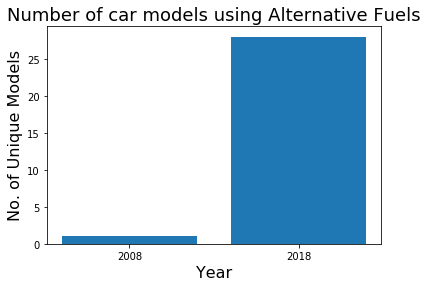

In [99]:
plt.bar(["2008", "2018"],[alternative_fuel_08, alternative_fuel_18])
plt.title("Number of car models using Alternative Fuels", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("No. of Unique Models", fontsize=16)
plt.show()

<p> - 24 more car models use alternative fuels in 2018</p>

### How much has the average fuel economy improved since 2008?

In [143]:
avg_08 = df_08.cmb_mpg.mean()

In [144]:
avg_18 = df_08.cmb_mpg.mean()

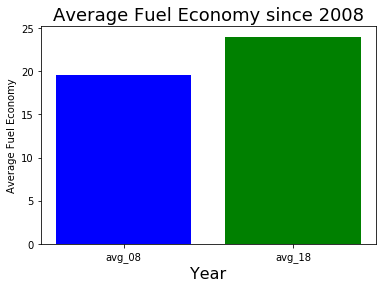

In [146]:
plt.subplots(figsize=(6, 4))
plt.bar(["avg_08", "avg_18"], [df_08.cmb_mpg.mean(), df_18.cmb_mpg.mean()], color=("blue", "green"))
plt.title("Average Fuel Economy since 2008", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Average Fuel Economy")
plt.show()

<p> - Fuel Economy has improved by 4% since 2008</p>

### Based on vehical type, how much has the average fuel economy improved since 2008?

In [153]:
vehical_type_08 = df_08.groupby("veh_class").cmb_mpg.mean().apply(np.int64)
vehical_type_08

veh_class
SUV              19
minivan          18
pickup           16
small car        21
station wagon    22
van              13
Name: cmb_mpg, dtype: int64

In [154]:
vehical_type_18 = df_18.groupby("veh_class").cmb_mpg.mean().apply(np.int64)
vehical_type_18

veh_class
SUV                23
minivan            20
pickup             18
small car          25
special purpose    18
station wagon      27
Name: cmb_mpg, dtype: int64

In [137]:
difference_by_type = vehical_type_18 - vehical_type_08
difference_by_type.dropna(inplace=True)

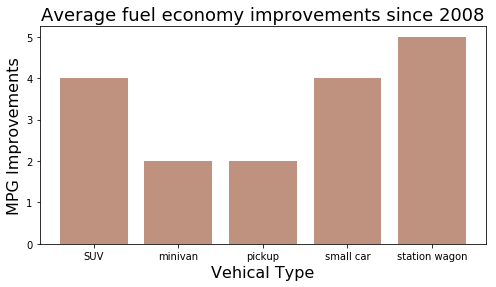

In [157]:
plt.subplots(figsize=(8, 4))
plt.bar(difference_by_type.index, difference_by_type, alpha=0.5, color='blue')
plt.bar(difference_by_type.index, difference_by_type, alpha=0.5, color='orange')
plt.title("Average fuel economy improvements since 2008", fontsize=18)
plt.xlabel("Vehical Type", fontsize=16)
plt.ylabel("MPG Improvements", fontsize=16)
plt.show()

<p> - Station Wagon's have had the greatest imporvements.

### Which model has the highest average air_pollution_score and fuel economy in 2008 and 2018? compare them

In [106]:
best_of_08 = df_08.query('air_pollution_score == 9.5 and cmb_mpg == 46')
best_of_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1389,TOYOTA Prius,1.5,(4 cyl),Auto-AV,2WD,Gasoline,midsize car,9.5,48,45,46,10.0,yes


In [107]:
best_of_18 = df_18.query('air_pollution_score == 7 and cmb_mpg == 106')
best_of_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
845,CHEVROLET Volt,1.5,4.0,CVT,2WD,Electricity,small car,7.0,113,99,106,10.0,Elite


In [108]:
categ_08 = best_of_08.iloc[:, 8:11].iloc[0]
categ_08

city_mpg    48
hwy_mpg     45
cmb_mpg     46
Name: 1389, dtype: int64

In [109]:
best_of_18 = df_18.query('air_pollution_score == 7 and cmb_mpg == 106')
categ_18 = best_of_18.iloc[:, 8:11].iloc[0]
categ_18

city_mpg    113
hwy_mpg      99
cmb_mpg     106
Name: 845, dtype: int64

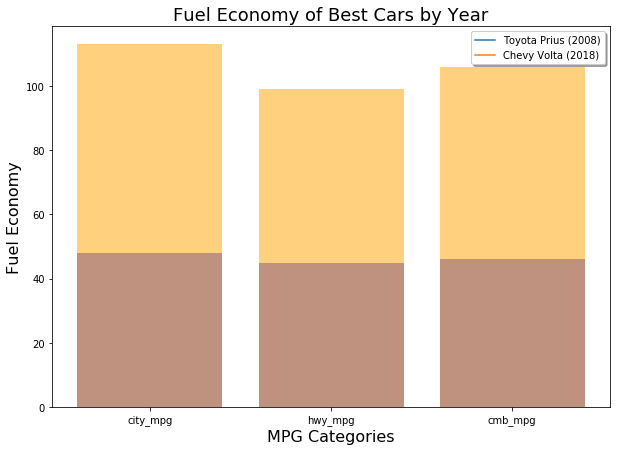

In [158]:
x = [0]
y = [0]

plt.subplots(figsize=(10, 7))
plt.bar(categ_08.index, categ_08, alpha=0.5, color="blue")
plt.bar(categ_18.index, categ_18, alpha=0.5, color="orange")

plt.title("Fuel Economy of Best Cars by Year", fontsize=18)
plt.xlabel("MPG Categories", fontsize=16)
plt.ylabel("Fuel Economy", fontsize=16)

plt.plot(x, label="Toyota Prius (2008)")
plt.plot(y, label="Chevy Volta (2018)")
plt.legend(loc="best", shadow=True,)

plt.show()

<p> - Toyota Prius had the highest in 2008 and Chevy Volta had the highest in 2018</p>